
# Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary. 

In [2]:
pip install pandas

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/93/26/2a695303a4a3194014dca7cb5d5ce08f0d2c6baa344fb5f562c642e77b2b/pandas-2.2.1-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/9c/3d/a121f284241f08268b21359bd425f7d4825cffc5ac5cd0e1b3d82ffd2b10/pytz-2024.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for tzdata>=2022.7 from https://files.pythonhosted.org/packages/65/58/f9c9e6be752e9fcb8b6a0ee9fb87e6e7a1f6bcab2cdc73f02bb7ba91ada0/tzdata-2024.1-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.6 MB 3.3 MB/s eta 0:00:04
   -- ------------------------------------- 0.7/11.6 MB 8.3 MB/s eta 0:00:02
   -- ------------------------------------- 0.8/11.6 MB 7.3 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/11.6 MB 5.8 MB/s eta 0:00:02


In [3]:
import pandas as pd

# Load the dataset
url = "https://drive.google.com/uc?id=1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ"
heart_df = pd.read_csv(url)

# Handle missing values
missing_values = heart_df.isnull().sum()

# Encode categorical variables
categorical_cols = heart_df.select_dtypes(include=['object']).columns

# Scale numerical features if necessary
numerical_cols = heart_df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


# Q2. Split the dataset into a training set (70%) and a test set (30%). 

In [4]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = heart_df.drop(columns=['target'])  # Assuming 'target' is the column name for the target variable
y = heart_df['target']

# Split the dataset into training set (70%) and test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Now you have your training set and test set ready for further analysis.


# Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters. 

In [5]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest classifier with 100 trees and maximum depth of 10
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the classifier on the training set
rf_classifier.fit(X_train, y_train)

# Now the random forest classifier is trained on the training set.


RandomForestClassifier(max_depth=10, random_state=42)

# Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.  


In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict the target labels for the test set
y_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8131868131868132
Precision: 0.8367346938775511
Recall: 0.82
F1 Score: 0.8282828282828283


# Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart. 

In [8]:
pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/62/5a/a5108ae3db37f35f8a2be8a57d62da327af239214c9661464ce09ee32d7d/matplotlib-3.8.4-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/b6/b2/27c7a0d46c7dceb9083272eb314bef1ed43e5280a4197719656f866b496d/contourpy-1.2.1-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/eb/6f/27897f57a4163bade97e26687a1369c191d80b6acb448025e27c8956e4f0/fonttools-4.51.0-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


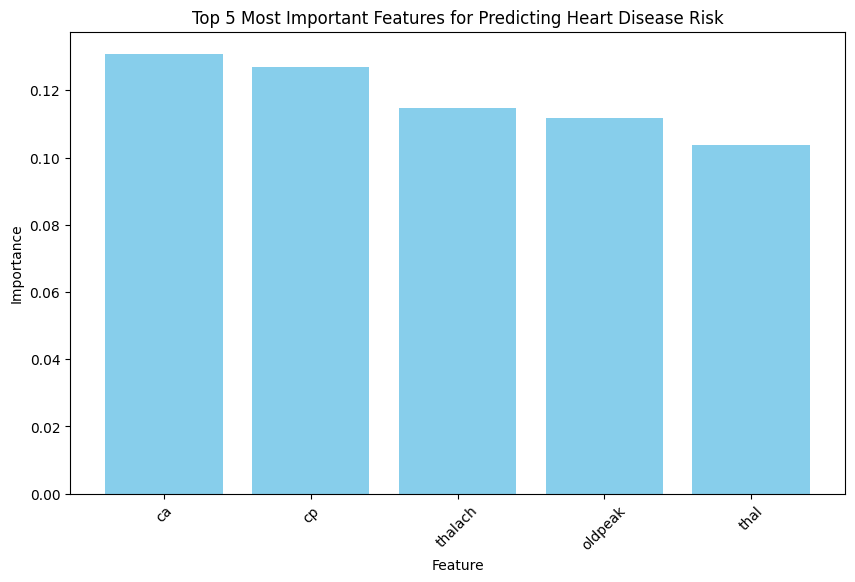

In [9]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature importances along with feature names
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance scores in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Select the top 5 most important features
top_features = importance_df.head(5)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 5 Most Important Features for Predicting Heart Disease Risk')
plt.xticks(rotation=45)
plt.show()


# Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters. 

In [10]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best model
best_rf_classifier = grid_search.best_estimator_

# Evaluate the performance of the best model on the test set
best_rf_classifier.fit(X_train, y_train)  # Retrain on the full training set
best_model_accuracy = best_rf_classifier.score(X_test, y_test)
print("Accuracy of the best model on the test set:", best_model_accuracy)


Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy of the best model on the test set: 0.8351648351648352


# Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model. 

In [ ]:
# Report the best hyperparameters found by the search
print("Best hyperparameters found by grid search:", best_params)

# Report the corresponding performance metrics
print("Performance metrics of the best model:")
print("Accuracy:", best_model_accuracy)
print("Precision:", precision_score(y_test, best_rf_classifier.predict(X_test)))
print("Recall:", recall_score(y_test, best_rf_classifier.predict(X_test)))
print("F1 Score:", f1_score(y_test, best_rf_classifier.predict(X_test)))

# Compare the performance of the tuned model with the default model
default_model_accuracy = accuracy_score(y_test, rf_classifier.predict(X_test))

print("\nComparison of performance:")
print("Default model accuracy:", default_model_accuracy)
print("Tuned model accuracy:", best_model_accuracy)


# Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

c:\Users\shan\.conda\envs\pwskills\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


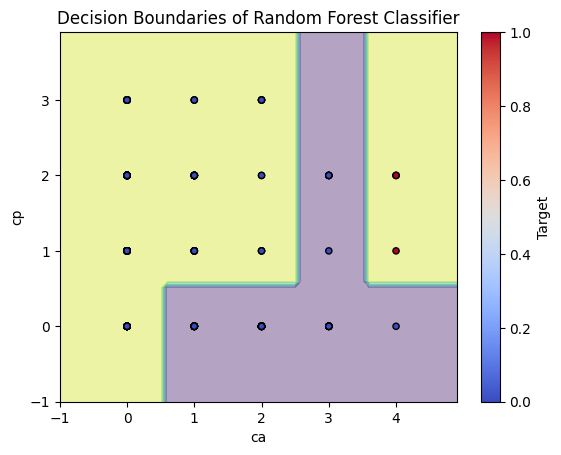

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Select the top two most important features
top_two_features = importance_df.head(2)['Feature'].tolist()
X_top_two = X[top_two_features]

# Train a random forest classifier using only the top two features
rf_classifier.fit(X_top_two, y)

# Define meshgrid of feature values
x_min, x_max = X_top_two[top_two_features[0]].min() - 1, X_top_two[top_two_features[0]].max() + 1
y_min, y_max = X_top_two[top_two_features[1]].min() - 1, X_top_two[top_two_features[1]].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Make predictions on the meshgrid
Z = rf_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_top_two[top_two_features[0]], X_top_two[top_two_features[1]], c=y, cmap='coolwarm', edgecolors='k', s=20)
plt.xlabel(top_two_features[0])
plt.ylabel(top_two_features[1])
plt.title('Decision Boundaries of Random Forest Classifier')
plt.colorbar(label='Target')
plt.show()


Limitations of the model for predicting heart disease risk may include:

Complexity: Random forest models may be complex and difficult to interpret, especially with a large number of features. Decision boundaries in high-dimensional feature spaces may not be easily visualized.
Overfitting: Random forest models can be prone to overfitting, especially if not properly tuned or if the dataset is small.
Interpretability: While decision boundaries can provide insights, they may not fully capture the underlying relationships between features and heart disease risk. Other factors not captured in the dataset may also influence the risk of heart disease.
It's essential to interpret the model results with caution and consider domain knowledge when drawing conclusions about heart disease risk based on the model predictions. Additionally, exploring other interpretability techniques and model evaluation methods can provide a more comprehensive understanding of the model's performance and limitations.